#### Tarea 3: Machine Learning
### Universidad de Valparaíso
## Alumno: Bastián Barraza
## Profesor: Alejandro Pereira

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import sklearn.metrics as sk_metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from scipy.special import expit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import BernoulliNB


from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/bastianbm7/Machine-Learning-Course/main/Data/data.csv")

### Comparar regression logística, SVM, Naïve Bayes, LDA y QDA usando las métricas de desmpeño correspondientes. Hacer un código con comentarios y analysis.

#### Limpieza Y preprocesamiento de datos:

Para asegurar la calidad y la precision de los modelos, primero se limpian y se procesan los datos. Para garantizar la limpieza se abordarán los siguientes puntos:

1) Renombrar columnas.
2) Reemplazar valores mal ingresados.
3) Eliminar columnas que no se utilizarán.
4) Eliminar valores perdidos.

In [3]:
df.rename(columns = {'num       ': 'attack'}, inplace = True) 
df.replace("?", np.nan, inplace = True)
df.drop(columns = ['slope', 'ca', 'thal'], inplace = True)
df.dropna(inplace= True)
df.shape

(261, 11)

In [4]:
# Valores perdidos:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
attack      0
dtype: int64

In [5]:
df['exang'].unique()

array(['0', '1'], dtype=object)

Notamos que no existen luego de realizar la limpieza, no existen datos perdidos y todos los datos tienen una estructura consistente. 

#### Definir variables

Ahora, se busca separar nuestro variable de respuesta de las demás covariables. En este caso, la variable de respuesta es la presencia de angina luego de realizar ejercisio físico (denotada como exang en el conjunto de datos).

In [6]:
y = df['exang']
x = df.drop(['exang'], axis=1)

#### Separar variables de prueba y entrenamiento:

Luego, serparamos el conjunto de datos en 70% entrenamiento y 30% prueba.

In [7]:
random_seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


#### Estandarizar datos

Luego, se busca estandarizar los datos. Este paso puede mejorar la interpretación de los datos y hacer que las comparaciones sean más significativas.

Además, la estandarización de los datos de muestra es útil porque puede ayudar a reducir la influencia de valores atípicos en los datos y mejorar la comparabilidad entre diferentes variables. 

En este caso, se utiliza la función fit_transform() para ajustar un objeto RobustScaler a los datos de entrenamiento y, a continuación, aplicar la transformación a los datos de entrenamiento para obtener un conjunto de datos escalados.

In [8]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### 1.- Regresion Logística:

Luego, se aplica el modelo de regresión logística con la librería sckit-learn. En nuestro caso, la variable respuesta es de tipo binaria, dado que solo existe la posibilidad de que el usuario (a) presente angina o no. Con el modelo de regresión se busca predecir la probabilidad de que se observe angina en los usuarios luego de realizar ejercisio físico, a partir de un conjunto de variables explicativas o características.


In [9]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

#### Matríz de confusión

In [10]:
y_pred = model.predict(x_test)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[47  7]
 [ 6 19]]


VN = 47

FP = 7

FN = 6

VP = 19

#### Métricas de desempeño:

In [11]:
# Calcula la tasa de exactitud (accuracy)
acc = accuracy_score(y_test, y_pred)
print("Exactitud (accuracy):", acc)

class_report = classification_report(y_test, y_pred)

print('Informe de clasificación:')
print(class_report)

Exactitud (accuracy): 0.8354430379746836
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.73      0.76      0.75        25

    accuracy                           0.84        79
   macro avg       0.81      0.82      0.81        79
weighted avg       0.84      0.84      0.84        79



In [12]:
# false positive rate
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

0.2692307692307692

La precisión del modelo indica que el 73% de las predicciones son correctas, mientras que el recall indica que el 76% de los verdaderos positivos han sido correctamente identificados. El puntaje F1 combinado indica que el modelo tiene un rendimiento razonablemente bueno. Sin embargo, la tasa de falsos positivos del 26.9% sugiere que existe una alta cantidad de falsos positivos, lo cual se puede mejorar. La rendimiento general del modelo es del 83.4%, lo que sugiere que el modelo puede ser útil para predecir la variable respuesta binaria

#### Curvas ROC y Precisión-Recall

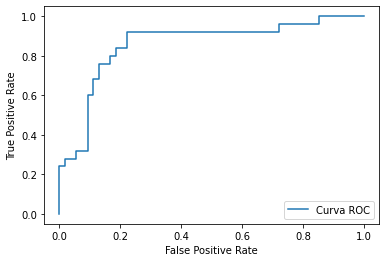

In [13]:
y_score = model.decision_function(x_test)
fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label= model.classes_[1])
roc_display = sk_metrics.RocCurveDisplay(fpr= fpr, tpr= tpr)
roc_display.plot(name='Curva ROC')

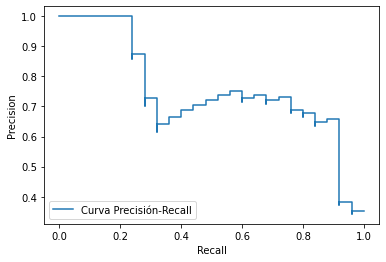

In [14]:
prec, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label= model.classes_[1])
pr_display = sk_metrics.PrecisionRecallDisplay(precision= prec, recall= recall)
pr_display.plot(name='Curva Precisión-Recall')

#### Cross-Validation:

In [15]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [16]:
scores

array([0.97297297, 0.89189189, 0.88888889, 0.83333333, 0.80555556])

In [17]:
scores.mean()

0.8785285285285285

In [18]:
scores.std()

0.057573136247461104

Los resultados obtenidos en la validación cruzada del modelo de regresión logística indican que el modelo tiene un buen rendimiento en la tarea de clasificación, ya que su precisión promedio es cercana al 88%. Además, los valores de precisión obtenidos en cada iteración de la validación cruzada son consistentes y se mantienen por encima del 80%, lo que sugiere que el modelo tiene la capacidad de generalizar bien a nuevos conjuntos de datos. 

#### 2.- SVM: 

En este siguiente paso, se reiniciarán los datos a su estado original y se aplicará el modelo SVM (Support Vector Machine) para realizar la clasificación de las variables de interés.

In [19]:
random_seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

#### Métricas de desempeño

In [21]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.1582552901749002
R²: 0.2683916548284797


Al calcular el MSE, uno espera que los resultados sean lo más cercano a 0 posible, para que el rendimiento del modelo sea nejor. En este caso, el MSE es de 0.15, lo que sugiere que el modelo tiene un error cuadrático medio relativamente bajo.

El R², por otro lado, es una medida de qué tan bien se ajustan los datos al modelo. Un R² de 1 indica un ajuste perfecto, mientras que un R² de 0 indica que el modelo no es mejor que una línea recta horizontal. En este caso, el R² es de 0.26, lo que sugiere que el modelo no explica una gran proporción a la variable de respuesta Y.


#### Cross-Validation:

In [22]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [23]:
scores

array([0.69089107, 0.58405009, 0.47991052, 0.38444358, 0.46557812])

In [24]:
scores.mean()

0.5209746758340791

In [25]:
scores.std()

0.10606212718256793

En este caso, los resultados indican que el modelo de SVM tiene un rendimiento inferior en comparación con el modelo de regresión logística. La precisión promedio obtenida es del 52%, lo que indica que el modelo clasifica no clasifica óptimamente la mitad de los datos de prueba. Además, los valores de precisión obtenidos en cada iteración de la validación cruzada son bastante bajos y varían significativamente con valores desde 0.69 a 0.38, lo que sugiere que el modelo no generaliza bien a nuevos conjuntos de datos.

#### 3.- Naive Bayes:

Ahora, se procederá a reiniciar los datos a los originales y aplicar el modelo Naive Bayes para realizar la clasificación de la variables de interés.

In [26]:
random_seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

#### Matríz de confusión

In [28]:
y_pred = model.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.810126582278481
Confusion matrix:
 [[45  9]
 [ 6 19]]


VN = 45

FP = 9

FN = 6

VP = 19

#### Métricas de desempeño

In [29]:
# Calcula la tasa de exactitud (accuracy)
acc = accuracy_score(y_test, y_pred)
print("Exactitud (accuracy):", acc)

class_report = classification_report(y_test, y_pred)

print('Informe de clasificación:')
print(class_report)

Exactitud (accuracy): 0.810126582278481
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.68      0.76      0.72        25

    accuracy                           0.81        79
   macro avg       0.78      0.80      0.79        79
weighted avg       0.82      0.81      0.81        79



In [30]:
# false positive rate
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

0.32142857142857145

Al evaluar el rendimiento del modelo de Naive Bayes en la prueba de machine learning, podemos concluir que el modelo tiene un rendimiento razonablemente bueno. La precisión del modelo indica que el 67.9% de las predicciones son correctas, mientras que el recall indica que el 76% de los verdaderos positivos han sido correctamente identificados. El puntaje F1 combinado indica que el modelo tiene un rendimiento razonablemente bueno. Sin embargo, la tasa de falsos positivos del 32.1% sugiere que hay margen de mejora. La exactitud general del modelo es del 81%, lo que sugiere que el modelo puede ser útil para predecir la variable respuesta binaria

#### Curva Precisión-Recall

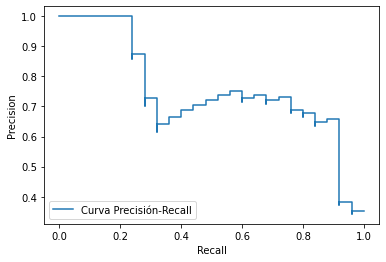

In [31]:
prec, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label= model.classes_[1])
pr_display = sk_metrics.PrecisionRecallDisplay(precision= prec, recall= recall)
pr_display.plot(name='Curva Precisión-Recall')

#### Cross-Validation:

In [32]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [33]:
scores

array([0.94594595, 0.86486486, 0.88888889, 0.80555556, 0.88888889])

In [34]:
scores.mean()

0.8788288288288288

In [35]:
scores.std()

0.045323463885064

Los resultados de la validación cruzada indican que el modelo de Naive Bayes es un clasificador eficaz en este caso, ya que su precisión promedio es del 87%, lo que sugiere que puede clasificar correctamente la mayoría de los datos de prueba. Además, los valores de precisión obtenidos en cada iteración son consistentes y están por encima del 80%, lo que indica que el modelo es robusto y puede generalizar bien a conjuntos de datos nuevos y desconocidos. Por lo tanto, el modelo de Naive Bayes podría ser una buena opción para esta tarea de clasificación, especialmente considerando su simplicidad y eficiencia computacional.

#### 4.- LDA

En este siguiente paso, se procederá a aplicar el modelo LDA (Linear Discriminant Analysis) para realizar la clasificación de las variables de interés, utilizando los datos originales que se han reiniciado.

In [36]:
random_seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

#### Matríz de confusión

In [38]:
y_pred = lda.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8227848101265823
Confusion matrix:
 [[46  8]
 [ 6 19]]


VN = 46

FP = 8

FN = 6

VP = 19

#### Métricas de desempeño

In [39]:
# Calcula la tasa de exactitud (accuracy)
acc = accuracy_score(y_test, y_pred)
print("Exactitud (accuracy):", acc)

class_report = classification_report(y_test, y_pred)

print('Informe de clasificación:')
print(class_report)

Exactitud (accuracy): 0.8227848101265823
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.70      0.76      0.73        25

    accuracy                           0.82        79
   macro avg       0.79      0.81      0.80        79
weighted avg       0.83      0.82      0.82        79



In [40]:
# false positive rate
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

0.2962962962962963

Al realizar un modelo LDA y evaluar la matriz de confusión, podemos ver que los resultados son similares a los obtenidos con el modelo de Naive Bayes anterior. La precisión del modelo LDA es del 69.7%, lo que indica que el 69.7% de las predicciones son correctas. El recall es del 76% y el puntaje F1 es de 0.722, lo que sugiere que el modelo tiene un rendimiento razonablemente bueno. La tasa de falsos positivos es del 29%, lo que es un poco mejor que el modelo de Naive Bayes anterior, sin embargo, esta métrica aumenta al comparar con la regresión logística. La exactitud general del modelo es del 82.5%, lo que indica que el modelo LDA también puede ser útil para predecir la variable respuesta binaria.

#### Curvas ROC y Precisión-Recall

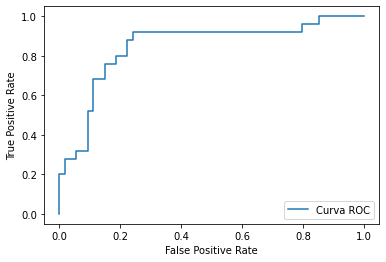

In [41]:
y_score = lda.decision_function(x_test)
fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label= model.classes_[1])
roc_display = sk_metrics.RocCurveDisplay(fpr= fpr, tpr= tpr)
roc_display.plot(name='Curva ROC')

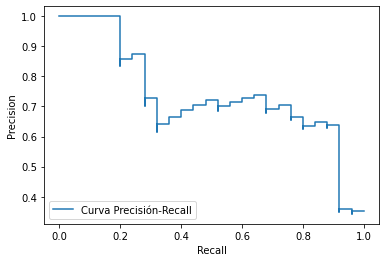

In [42]:
prec, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label= model.classes_[1])
pr_display = sk_metrics.PrecisionRecallDisplay(precision= prec, recall= recall)
pr_display.plot(name='Curva Precisión-Recall')

#### Cross-Validation:

In [43]:
scores = cross_val_score(lda, x_train, y_train, cv=5)

In [44]:
scores

array([0.94594595, 0.86486486, 0.83333333, 0.83333333, 0.83333333])

In [45]:
scores.mean()

0.8621621621621622

In [46]:
scores.std()

0.04363560734526966

El promedio obtenida en la validación cruzada fue de 0.862, lo que indica que el modelo LDA tiene un buen rendimiento en la tarea de clasificación en tus datos. Además, los valores de precisión obtenidos en cada iteración de la validación cruzada son relativamente estables y están todos por encima del 0,8, lo que sugiere que el modelo LDA es robusto y generaliza bien a datos nuevos.

#### 5.- QDA

Luego, se procederá a aplicar el modelo QDA (Quadratic Discriminant Analysis) para realizar la clasificación de las variables de interés, utilizando los datos originales que se han reiniciado

In [47]:
random_seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

#### Matríz de confusión

In [49]:
y_pred = qda.predict(x_test)


print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[43 11]
 [ 6 19]]


VN = 43

FP = 11

FN = 6

VP = 19

#### Métricas de desempeño

In [50]:
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Informe de clasificación:')
print(class_report)

Accuracy: 0.7848101265822784
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.63      0.76      0.69        25

    accuracy                           0.78        79
   macro avg       0.76      0.78      0.76        79
weighted avg       0.80      0.78      0.79        79



In [51]:
# false positive rate
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

0.36666666666666664

La precisión del modelo es del 63%, lo que indica que el 63% de las predicciones son correctas. El recall es del 76% y el puntaje F1 es de 0.69, lo que sugiere que el modelo tiene un rendimiento razonablemente bueno. La tasa de falsos positivos es del 36.6%, que es más alta que los modelos anteriores. La exactitud general del modelo es del 78.5%, lo que sugiere que el modelo QDA puede ser útil para predecir la variable respuesta binaria, pero no tan efectivo como los modelos anteriores.

En general, estos resultados sugieren que el modelo QDA no es tan efectivo como los modelos anteriores en la predicción de la variable respuesta binaria. Es posible que el modelo QDA no esté bien ajustado a los datos o que los datos no se ajusten bien al modelo QDA. 

#### Curvas ROC y Precisión-Recall

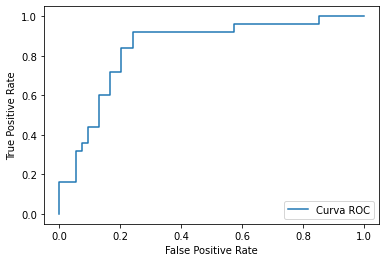

In [52]:
y_score = qda.decision_function(x_test)
fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label= model.classes_[1])
roc_display = sk_metrics.RocCurveDisplay(fpr= fpr, tpr= tpr)
roc_display.plot(name='Curva ROC')

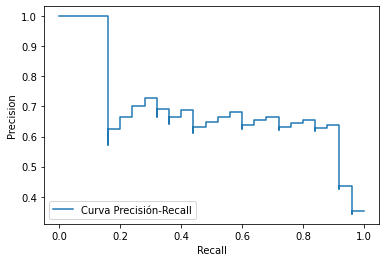

In [53]:
prec, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label= model.classes_[1])
pr_display = sk_metrics.PrecisionRecallDisplay(precision= prec, recall= recall)
pr_display.plot(name='Curva Precisión-Recall')

#### Cross-Validation:

In [54]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [55]:
scores

array([0.94594595, 0.86486486, 0.88888889, 0.80555556, 0.88888889])

In [56]:
scores.mean()

0.8788288288288288

In [57]:
scores.std()

0.045323463885064

Los resultados de la validación cruzada muestran que el modelo QDA tiene un buen rendimiento, con una precisión promedio cercana al 87%. Además, los valores de precisión obtenidos en cada iteración de la validación cruzada son relativamente estables y están todos por encima del 80%, lo que sugiere que el modelo es robusto y generaliza bien a nuevos conjuntos de datos.